<a href="https://colab.research.google.com/github/kyhong0528/IT_system/blob/master/IT_%EC%8B%9C%EC%8A%A4%ED%85%9C_%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


313/313 - 0s - loss: 13.1366 - accuracy: 0.1102
0


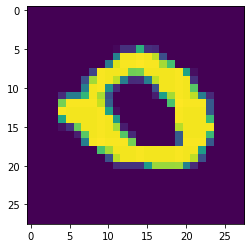

In [64]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D
'''
load data
'''
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

'''
data augmentation
'''
 
X_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
X_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(
featurewise_center=True,horizontal_flip=True,
rescale=1000,featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)

'''
테스트, 트레이닝 여부, network 선택, mnist 변화 선택
'''
mode = 'test'
network = 'sigmoid'
mnist_variation = 'rotate'
 
def resize(mnist):
     i = 0;
     for img in x_test:
            
            resized_img = cv2.resize(img, (50, 50))
            train_data = np.array([i,resized_img])
            i = i+1
     return train_data
 
if(mnist_variation == 'basic'):
   x_test = x_test
if(mnist_variation == 'rotate'): #회전
  x_test = np.rot90(x_test, k =1, axes = (1,2))
if(mnist_variation == 'flip'): #뒤집기
  x_test = np.flip(x_test,(1,2))
if(mnist_variation == 'scale'): # 축소
   x_test = cv2.resize(x_test,(24,24))

'''
training session
'''
if(mode == 'train'):
  if(network == 'basic'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    '''
    paprameter 저장
    '''
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5)
    model.save('/tmp/model_basic')

  if(network == 'sigmoid'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    '''
    paprameter 저장
    '''
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5)
    model.save('/tmp/sigmoid')

  if(network == 'tanh'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    '''
    paprameter 저장
    '''
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5)
    model.save('/tmp/tanh')
 
  if(network == 'more_layer'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    '''
    paprameter 저장
    '''
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)
    model.save('/tmp/more_layer')

  if(network == 'con'):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.02),
                           input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    print(x_train.shape)
    model.fit(x_train, epochs=5)
    model.save('/tmp/con')
'''
test session
'''
if(mode == 'test'):
  if(network == 'basic'):
   loaded_model = tf.keras.models.load_model('/tmp/model_basic')
  if(network == 'tanh'):
   loaded_model = tf.keras.models.load_model('/tmp/tanh')
  if(network == 'sigmoid'):
   loaded_model = tf.keras.models.load_model('/tmp/sigmoid')
  if(network == 'more_layer'):
    loaded_model = tf.keras.models.load_model('/tmp/more_layer')
  if(network == 'con'):
    loaded_model = tf.keras.models.load_model('/tmp/con')
 
  loaded_model.evaluate(x_test,  y_test, verbose=2)
  
  print(y_test[3])
 
#model.evaluate(x_test,  y_test, verbose=2)
 
plt.imshow(x_test[3])

